In [13]:
import csv, datetime, pandas as pd

# Read data for January 6

In [15]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-06-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(4307, 12)


Finding out unique sources

In [3]:
unique_src = data.src.unique()
print(len(unique_src))

1038


Unique ip sources frequency table

In [4]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

           Unique src  Count
440     185.107.94.10    722
370    179.184.227.26    587
1011     93.115.26.45    505
645   208.113.204.247    171
714   221.229.204.101     95


In [5]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   3841
0       amun    466


Grouping by timestamp

In [8]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-05 06:52:48      1
1 2018-01-05 06:53:08      1
2 2018-01-05 06:54:08      1
3 2018-01-05 06:55:18      1
4 2018-01-05 06:55:28      2


In [10]:
time_series = data.groupby(df.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0    0.0     94
1    1.0     91
2    2.0     86
3    3.0     80
4    4.0     82
5    5.0     83
6    6.0     96
7    7.0    168
8    8.0     70
9    9.0     83
10  10.0     88
11  11.0     96
12  12.0    103
13  13.0    106
14  14.0    104
15  15.0     94
16  16.0     99
17  17.0    112
18  18.0    105
19  19.0    103
20  20.0     95
21  21.0     92
22  22.0    121
23  23.0    108


Bar chart of time stamp count

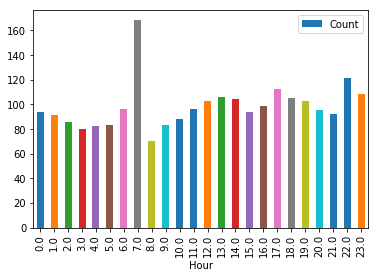

In [12]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')